### Data_Loader Testing

In [1]:
import data_loader
import torch
from torch.utils.data import DataLoader
from pathlib import Path
from torchvision.transforms import v2 as transforms


In [2]:
targ_dir = Path("mbrimberry_files\Submissions")

In [3]:
trans = transforms.Compose(
    [
        transforms.ToImage(),
        transforms.Resize(size=(1056,816))
        
    ])
submission_data = data_loader.DeskTopDataset(targ_dir=targ_dir,transform=trans)

Desk Images\classes.txt


torch.Size([4, 1056, 816])
torch.Size([1056, 816, 4])


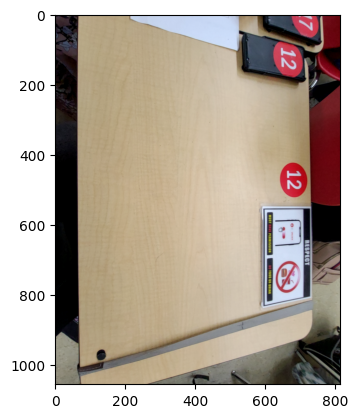

In [4]:
import matplotlib.pyplot as plt
image, targets = submission_data[2]
print(f"{image.shape}")
image_permute = image.permute(1,2,0)
print(f"{image_permute.shape}")
fig, ax = plt.subplots(1)
ax.imshow(image_permute)

In [10]:
no_bbox = torch.empty((1,0), dtype=torch.float32)
no_bbox

tensor([], size=(0, 4))

In [15]:
t = torch.tensor([[1,2,3,4]])
t.shape

torch.Size([1, 4])

In [18]:
result = torch.cat((t,no_bbox), dim = 0)
result.shape

torch.Size([1, 4])

In [11]:
img, targets = submission_data[3]
# print(img)
print(targets['boxes'].shape)

torch.Size([1, 4])


In [41]:
len(submission_data)

42

In [42]:
submission_data.classes

['Calculator', 'Desk number']

In [43]:
BATCH_SIZE= 32
NUM_WORKERS = 1

dataloader = DataLoader(dataset=submission_data,
                        batch_size=BATCH_SIZE,
                        num_workers=NUM_WORKERS,
                        shuffle=False)

In [44]:
def collate_fn(batch):
    return{
        'img' : torch.stack([x['img'] for x in batch])
    }

In [45]:
img, targets = next(iter(dataloader))

RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "c:\Users\Josh\miniconda3\envs\torchCUDA\Lib\site-packages\torch\utils\data\_utils\worker.py", line 309, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Josh\miniconda3\envs\torchCUDA\Lib\site-packages\torch\utils\data\_utils\fetch.py", line 55, in fetch
    return self.collate_fn(data)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Josh\miniconda3\envs\torchCUDA\Lib\site-packages\torch\utils\data\_utils\collate.py", line 317, in default_collate
    return collate(batch, collate_fn_map=default_collate_fn_map)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Josh\miniconda3\envs\torchCUDA\Lib\site-packages\torch\utils\data\_utils\collate.py", line 174, in collate
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Josh\miniconda3\envs\torchCUDA\Lib\site-packages\torch\utils\data\_utils\collate.py", line 174, in <listcomp>
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Josh\miniconda3\envs\torchCUDA\Lib\site-packages\torch\utils\data\_utils\collate.py", line 155, in collate
    clone.update({key: collate([d[key] for d in batch], collate_fn_map=collate_fn_map) for key in elem})
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Josh\miniconda3\envs\torchCUDA\Lib\site-packages\torch\utils\data\_utils\collate.py", line 155, in <dictcomp>
    clone.update({key: collate([d[key] for d in batch], collate_fn_map=collate_fn_map) for key in elem})
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Josh\miniconda3\envs\torchCUDA\Lib\site-packages\torch\utils\data\_utils\collate.py", line 170, in collate
    raise RuntimeError('each element in list of batch should be of equal size')
RuntimeError: each element in list of batch should be of equal size


In [54]:
import torchvision
import torchvision.transforms.v2
from torchvision import utils
from torchvision.transforms.v2 import functional as F
viz = utils.draw_bounding_boxes(F.ToImage(img), boxes=bbox)
F.to_pil_image(viz).show()

AttributeError: module 'torchvision.transforms.v2.functional' has no attribute 'ToImage'